Para esta actividad trabajaremos con una base de datos de calificaciones de estudiantes. Nos interesa tratar de predecir la calificación final de estudiantes de un curso, en base a su información demográfica y sus
calificaciones de los primeros dos periodos semestrales.

Utilizaremos el archivo “A1.5 Calificaciones.csv”, donde podremos encontrar información
de 395 estudiantes, con 10 variables en total. Los datos se descargaron del Student
Performance Data Set en el UCI Machine Learning Repository.


1. Importamos los datos del archivo “A1.5 Calificaciones.csv”. Imprimimos en consola
el tipo de dato de cada variable del data frame.


In [103]:
import pandas as pd
archivo = 'A1.5 Calificaciones.csv'
datos = pd.read_csv(archivo)

print(datos.dtypes)

Escuela           object
Sexo              object
Edad               int64
HorasDeEstudio     int64
Reprobadas         int64
Internet          object
Faltas             int64
G1                 int64
G2                 int64
G3                 int64
dtype: object


2. Transformams todas las variables categóricas, de forma que los nuevos datos sean útiles
para generar un modelo de regresión lineal múltiple. Es importante atender que a pesar de que parezcan variables cuantitativas, en realidad son clases de cosas lo cua exige procesarlo para poder utilizarlos en regresiones lineales. Imprimiremos las primeras 5 observaciones de la base de
datos modificada, demostrando que las variables cualitativas desaparecieron y fueron
reemplazadas por variables adecuadas.

In [105]:
# Convertir la variable 'Escuela' a variables binarias
datos = pd.get_dummies(datos, columns=['Escuela'], drop_first=True)

# Convertir la variable 'Sexo' a variables binarias
datos = pd.get_dummies(datos, columns=['Sexo'], drop_first=True)

# Convertir la variable 'Internet' a variables binarias
datos = pd.get_dummies(datos, columns=['Internet'], drop_first=True)

# Convertir la variable 'HorasDeEstudio' a una variable numérica ordinal.
# (1: menos de dos horas, 2: de dos a cuatro hras)
datos['HorasDeEstudio'] = datos['HorasDeEstudio'].astype(int)

# Convertir la variable 'Reprobadas' en variable numérica, debido a que es un valor entero, podemos dejarlo tal cual
datos['Reprobadas'] = datos['Reprobadas'].astype(int)

# Imprimimos 
print(datos.head())

   Edad  HorasDeEstudio  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  \
0    18               2           0       6   5   6   6       False   False   
1    17               2           0       4   5   5   6       False   False   
2    15               2           3      10   7   8  10       False   False   
3    15               3           0       2  15  14  15       False   False   
4    16               2           0       4   6  10  10       False   False   

   Internet_yes  
0         False  
1          True  
2          True  
3          True  
4         False  


3. Identificaremos valores atípicos para la variable “Faltas”, utilizando el método de Tukey con k=3.
Imprimiremos en consola todas las observaciones que se consideren atípicas, y tras revisar las
características de dichas observaciones, agregaremos una línea de texto que describa qué
se hará con dichos valores y por qué. 

In [107]:
# Calculamos los cuartiles Q1 y Q3 de la variable 'Faltas'
Q1 = datos['Faltas'].quantile(0.25)
Q3 = datos['Faltas'].quantile(0.75)

# Calculamos el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Establecemos los límites inferior y superior para los valores atípicos con k=3
limite_inferior = Q1 - 3 * IQR
limite_superior = Q3 + 3 * IQR

# Filtramos los valores atípicos
valores_atipicos = datos[(datos['Faltas'] < limite_inferior) | (datos['Faltas'] > limite_superior)]

# Imprimimos 
print(valores_atipicos)

     Edad  HorasDeEstudio  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  \
74     16               2           0      54  11  12  11       False   False   
183    17               2           0      56   9   9   8       False   False   
276    18               2           0      75  10   9   9       False   False   
307    19               1           1      38   8   9   8       False    True   
315    19               3           1      40  13  11  11       False   False   

     Internet_yes  
74           True  
183          True  
276          True  
307          True  
315          True  


Para este tipo de valores atípicos, se podrían eliminar si son errores evidentes o si son demasiado distorsionadores. Otra opción es analizar si estos valores son relevantes para el modelo. O bien, podrías estimar por medio de promedio de otros datos el huco que qudaría al borrar el dato erronio, o aplicar una regresión lineal para predecir el modelo que va en el hueco.

En este caso, por que es lo más práctico y eficiente, eliminaré a los alumnos completos para poder continuar de forma práctica la regresión.

In [109]:
datos_sin_atipicos = datos[(datos['Faltas'] >= limite_inferior) & (datos['Faltas'] <= limite_superior)]

# Imprimimos las primeras 5 observaciones para verificar que los valores atípicos fueron eliminados
print(datos_sin_atipicos.head())

filas_eliminadas = len(datos) - len(datos_sin_atipicos)

print(f"Se han eliminado {filas_eliminadas} filas debido a valores atípicos en 'Faltas'.")

   Edad  HorasDeEstudio  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  \
0    18               2           0       6   5   6   6       False   False   
1    17               2           0       4   5   5   6       False   False   
2    15               2           3      10   7   8  10       False   False   
3    15               3           0       2  15  14  15       False   False   
4    16               2           0       4   6  10  10       False   False   

   Internet_yes  
0         False  
1          True  
2          True  
3          True  
4         False  
Se han eliminado 5 filas debido a valores atípicos en 'Faltas'.


4. Generaremos una matriz de correlaciones para encontrar potenciales problemas de
colinealidad. Generaremos un heatmap para visualizar de forma más sencilla los resultados.

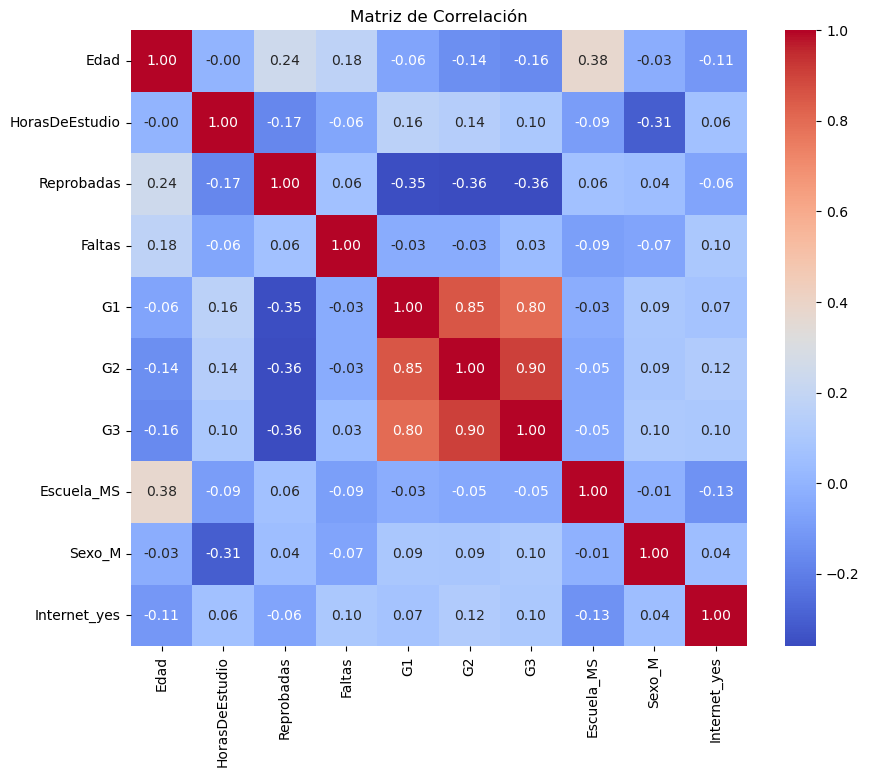

In [111]:
# Importamos las librerías necesarias
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación
matriz_correlacion = datos.corr()

# Visualizamos la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))  # Tamaño del gráfico
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Matriz de Correlación')
plt.show()

Determinaremos si es necesario eliminar una o múltiples variables; en este caso nos percatamos que G3 y G2 están relacionadas con un 0.9. Esto sugiere que estas dos calificaciones están altamente corelacionadas, por lo que podría ser innecesario tener ambas variables en un modelo de regresión, y podrías eliminar una de ellas para evitar la multicolinealidad en nuestro modelo, lo que mejora la estabilidad y la interpretabilidad.

Se toma la decisión de eliminar G2.

In [113]:
datos = datos.drop(columns=['G2'])
print(datos.head())

   Edad  HorasDeEstudio  Reprobadas  Faltas  G1  G3  Escuela_MS  Sexo_M  \
0    18               2           0       6   5   6       False   False   
1    17               2           0       4   5   6       False   False   
2    15               2           3      10   7  10       False   False   
3    15               3           0       2  15  15       False   False   
4    16               2           0       4   6  10       False   False   

   Internet_yes  
0         False  
1          True  
2          True  
3          True  
4         False  


5. Incluiremos términos de interacción para al menos dos pares de variables. Trataremos de evitar incluir interacciones para
todos los pares de variables posibles. Imprimiremos en consola las primeras 5 observaciones
de la base de datos con los nuevos términos.

In [115]:
# Términos de interacción
datos['HorasDeEstudio_Edad'] = datos['HorasDeEstudio'] * datos['Edad']
datos['Faltas_Reprobadas'] = datos['Faltas'] * datos['Reprobadas']

print(datos[['HorasDeEstudio', 'Edad', 'HorasDeEstudio_Edad', 'Faltas', 'Reprobadas', 'Faltas_Reprobadas']].head())


   HorasDeEstudio  Edad  HorasDeEstudio_Edad  Faltas  Reprobadas  \
0               2    18                   36       6           0   
1               2    17                   34       4           0   
2               2    15                   30      10           3   
3               3    15                   45       2           0   
4               2    16                   32       4           0   

   Faltas_Reprobadas  
0                  0  
1                  0  
2                 30  
3                  0  
4                  0  


Es altamente probale que esxista una relacón interesante entre las faltas de un alumno y las materias reprobadas. Así como también las horas de estudio pueden llegar a afectarse dependiendo de que tantas responsabilidades extra adquiera el alumno conforme su edad aumenta.


6. Entrenaremos un modelo de regresión lineal múltiple en un subconjunto de datos que
corresponda al 80% de los datos totales e impriremos en consola un resumen de los
resultados obtenidos. Posteriormente, usando dicho modelo, predeciremos la calificación final
del 20% de las observaciones que no se usaron para entrenar. Generaremos una gráfica de
dispersión de las calificaciones finales reales contra las calificaciones finales estimadas
por el modelo en los datos de prueba.


Coeficientes del modelo: [-0.31344611  1.30663593 -1.15513384  0.01778351  1.0641076   0.20292444
  0.40141789  0.13771082 -0.08271369  0.1148189 ]
Intercepto del modelo: 3.818741305186748
Real: 10, Predicción: 4.701729037228082
Real: 12, Predicción: 13.687410952359148
Real: 5, Predicción: 1.449427354433888
Real: 10, Predicción: 7.562877123412042
Real: 9, Predicción: 7.4472208879386965


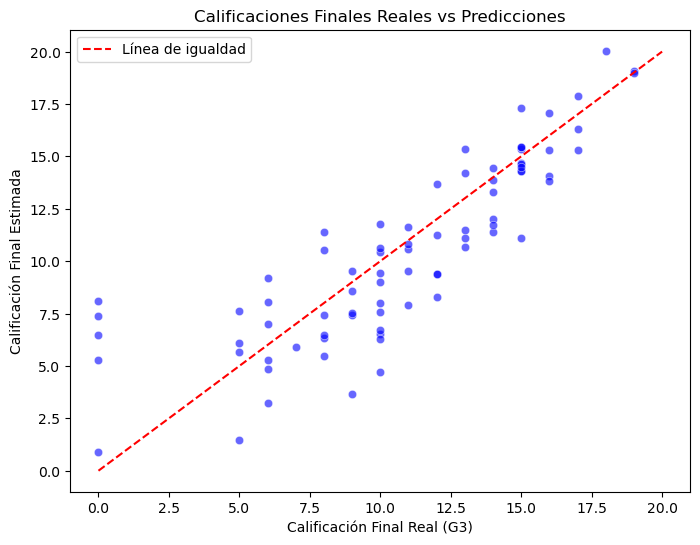

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

X = datos.drop(columns=['G3'])  # Eliminamos la columna G3 que es la variable dependiente
y = datos['G3']  # Variable dependiente 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()

# Entrenamos el modelo
modelo.fit(X_train, y_train)

# Resumen del modelo
print(f"Coeficientes del modelo: {modelo.coef_}")
print(f"Intercepto del modelo: {modelo.intercept_}")

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Mostramos la primera fila de las predicciones vs. valores reales
for real, pred in zip(y_test.head(), y_pred[:5]):
    print(f"Real: {real}, Predicción: {pred}")

# Gráfica de dispersión 
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([0, 20], [0, 20], color='red', linestyle='--', label="Línea de igualdad")
plt.title('Calificaciones Finales Reales vs Predicciones')
plt.xlabel('Calificación Final Real (G3)')
plt.ylabel('Calificación Final Estimada')
plt.legend()
plt.show()


Conclusión: La dispersión de los puntos alrededor de la línea roja sugiere que el modelo tiene un rendimiento decente e interesante para analizar, aunque se pueden observar algunos errores de predicción en las calificaciones más altas y más bajas. Personalemnte y transportantdolo al mucndo a un análisis más empírico, si nos vamos a calificaciones muy bajas, existen factores que muchas veces no tomamos en cuenta, condiciones extremas que hacen que no solo existan calificaciones bajas si no que de plano bajen exponencialmente como por ejemplo que el alumno tenga una limitante de recursos o física que no le permita seguir con la materia de forma adecuada. 
